In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel("../../Data/Model_Data_Rev1.xlsx")
df.dropna(inplace=True, how='any')
df.head()

Using TensorFlow backend.


,Date,Active_Rig_Count,Offshore_Rig_Supply,Offshore_Rig_Active,Offshore_Utilization_Rate,Land_Rig_Active_Count,Crude_Price_2010_USD,Adjusted_Nat_Gas_Price_2010,World_Oil_Cunsump,World_Oil_Production
130,1985-11-01,3550,656.13,560.67,85.45,2989.33,61.65,4.721732,4992.770925,4929.677119
131,1985-12-01,3618,655.52,557.97,85.12,3060.03,54.23,4.540844,5149.646289,4929.677119
132,1986-01-01,3495,658.23,541.16,82.22,2953.84,45.53,4.524317,5149.646289,5127.913140
133,1986-02-01,3123,656.32,512.18,78.04,2610.82,30.70,4.492806,5149.646289,5127.913140
134,1986-03-01,2681,655.81,467.77,71.33,2213.23,25.22,4.317624,5149.646289,5127.913140


In [9]:
train=df[df['Date']<'2018-01-01']
test=df[df['Date']>='2018-01-01']

In [10]:
train.columns

Index(['Date', 'Active_Rig_Count', 'Offshore_Rig_Supply',
       'Offshore_Rig_Active', 'Offshore_Utilization_Rate',
       'Land_Rig_Active_Count', 'Crude_Price_2010_USD',
       'Adjusted_Nat_Gas_Price_2010', 'World_Oil_Cunsump',
       'World_Oil_Production'],
      dtype='object')

In [19]:
def future(feature, look_back, model_name):
    def create_dataset(data, look_back=1):
        dataX, dataY = [], []
        for i in range(len(data)-look_back-1):
            a = data[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(data[i + look_back, 0])
        return np.array(dataX), np.array(dataY)
    data = np.reshape(feature.values, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    X, y = create_dataset(data, look_back)
    # reshape input to be [samples, time steps, features]
    X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, look_back)))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    model.fit(X, y, epochs=350, batch_size=1, verbose=2)
    model.save(f"{model_name}")

    # make prediction
    val = data[-look_back:] # last batch in the training data
    predictions = []

    # forecast the next 200 data points
    for _ in range(12):
        pred = model.predict(val.reshape(1,1,look_back))
        predictions = np.append(predictions,pred)
        val = np.append(np.delete(val, 0), pred) # update the data batch to be fed in the next iteration
        predictions = predictions.reshape(predictions.shape[0],1)

    # reverse forecasted results to its original scale
    predictions = scaler.inverse_transform(predictions)
    
    prediction_list=[pre[0] for pre in predictions.tolist()]
    return prediction_list

In [20]:
rig_count = future(train["Active_Rig_Count"], 300, "active_rig_count.h5")

Epoch 1/350
 - 0s - loss: 0.0715 - mean_squared_error: 0.0715
Epoch 2/350
 - 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 3/350
 - 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 4/350
 - 0s - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 5/350
 - 0s - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 6/350
 - 0s - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 7/350
 - 0s - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 8/350
 - 0s - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 9/350
 - 0s - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 10/350
 - 0s - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 11/350
 - 0s - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 12/350
 - 0s - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 13/350
 - 0s - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 14/350
 - 0s - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 15/350
 - 0s - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 16/350
 - 0s - loss: 0.0023 - mean_squared_error: 0.0023
E

Epoch 122/350
 - 0s - loss: 4.3073e-04 - mean_squared_error: 4.3073e-04
Epoch 123/350
 - 0s - loss: 4.5917e-04 - mean_squared_error: 4.5917e-04
Epoch 124/350
 - 0s - loss: 3.8283e-04 - mean_squared_error: 3.8283e-04
Epoch 125/350
 - 0s - loss: 5.1088e-04 - mean_squared_error: 5.1088e-04
Epoch 126/350
 - 0s - loss: 2.8277e-04 - mean_squared_error: 2.8277e-04
Epoch 127/350
 - 0s - loss: 3.9558e-04 - mean_squared_error: 3.9558e-04
Epoch 128/350
 - 0s - loss: 2.6669e-04 - mean_squared_error: 2.6669e-04
Epoch 129/350
 - 0s - loss: 6.7653e-04 - mean_squared_error: 6.7653e-04
Epoch 130/350
 - 0s - loss: 3.5180e-04 - mean_squared_error: 3.5180e-04
Epoch 131/350
 - 0s - loss: 2.6931e-04 - mean_squared_error: 2.6931e-04
Epoch 132/350
 - 0s - loss: 3.1148e-04 - mean_squared_error: 3.1148e-04
Epoch 133/350
 - 0s - loss: 2.8454e-04 - mean_squared_error: 2.8454e-04
Epoch 134/350
 - 0s - loss: 3.7016e-04 - mean_squared_error: 3.7016e-04
Epoch 135/350
 - 0s - loss: 3.8557e-04 - mean_squared_error: 3.8

 - 0s - loss: 1.4673e-04 - mean_squared_error: 1.4673e-04
Epoch 237/350
 - 0s - loss: 2.9870e-04 - mean_squared_error: 2.9870e-04
Epoch 238/350
 - 0s - loss: 6.5739e-04 - mean_squared_error: 6.5739e-04
Epoch 239/350
 - 0s - loss: 6.3993e-04 - mean_squared_error: 6.3993e-04
Epoch 240/350
 - 0s - loss: 3.6300e-04 - mean_squared_error: 3.6300e-04
Epoch 241/350
 - 0s - loss: 4.6098e-04 - mean_squared_error: 4.6098e-04
Epoch 242/350
 - 0s - loss: 2.8541e-04 - mean_squared_error: 2.8541e-04
Epoch 243/350
 - 0s - loss: 2.4762e-04 - mean_squared_error: 2.4762e-04
Epoch 244/350
 - 0s - loss: 1.2141e-04 - mean_squared_error: 1.2141e-04
Epoch 245/350
 - 0s - loss: 2.6061e-04 - mean_squared_error: 2.6061e-04
Epoch 246/350
 - 0s - loss: 1.8217e-04 - mean_squared_error: 1.8217e-04
Epoch 247/350
 - 0s - loss: 2.5477e-04 - mean_squared_error: 2.5477e-04
Epoch 248/350
 - 0s - loss: 1.0200e-04 - mean_squared_error: 1.0200e-04
Epoch 249/350
 - 0s - loss: 3.6861e-04 - mean_squared_error: 3.6861e-04
Epoch 

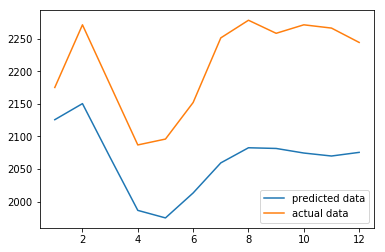

In [18]:
#data_len = len(data)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],p_list,label="predicted data")

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],test["Active_Rig_Count"],label="actual data")
plt.legend()
plt.show()